<a href="https://colab.research.google.com/github/DataGalz/CIND820/blob/main/CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries and uploading the data

In [345]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier





In [286]:

url = 'https://raw.githubusercontent.com/DataGalz/CIND820/main/BCPI_MONTHLY-sd-1972-01-01.csv'

data = pd.read_csv(url)

In [285]:
df = pd.DataFrame(data)
print(df)
#converted the data into a dataframe

           date  M.BCPI  M.BCNE   M.ENER  M.MTLS   M.FOPR  M.AGRI   M.FISH
0    1972-01-01  100.00  100.00   100.00  100.00   100.00  100.00   100.00
1    1972-02-01  100.40  100.53    99.78  100.74   100.12  101.20    88.89
2    1972-03-01  101.11  101.35   100.05  101.38   100.24  102.53    98.97
3    1972-04-01  101.16  101.45    99.84  101.21   100.95  102.08   103.10
4    1972-05-01  101.88  102.30   100.00  101.25   102.32  103.53    86.30
..          ...     ...     ...      ...     ...      ...     ...      ...
592  2021-05-01  603.08  524.90  1173.22  733.52  1101.94  310.20  1451.32
593  2021-06-01  606.63  488.98  1289.50  720.94   838.80  306.31  1534.54
594  2021-07-01  593.87  455.44  1334.47  730.52   536.88  321.88  1737.96
595  2021-08-01  568.19  440.31  1261.77  738.36   437.00  328.36  1658.92
596  2021-09-01  596.69  446.58  1378.81  749.09   477.69  315.44  1718.73

[597 rows x 8 columns]


# Exploring the Dataset

In [159]:
df.dtypes
#checking the type of data

date       object
M.BCPI    float64
M.BCNE    float64
M.ENER    float64
M.MTLS    float64
M.FOPR    float64
M.AGRI    float64
M.FISH    float64
dtype: object

In [160]:
df.head(5)
# the first 5 rows of the data

,date,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
0,1972-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1972-02-01,100.40,100.53,99.78,100.74,100.12,101.20,88.89
2,1972-03-01,101.11,101.35,100.05,101.38,100.24,102.53,98.97
3,1972-04-01,101.16,101.45,99.84,101.21,100.95,102.08,103.10
4,1972-05-01,101.88,102.30,100.00,101.25,102.32,103.53,86.30


In [161]:
df.tail(5)
#the last 5 rows of the data

,date,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
592,2021-05-01,603.08,524.90,1173.22,733.52,1101.94,310.20,1451.32
593,2021-06-01,606.63,488.98,1289.50,720.94,838.80,306.31,1534.54
594,2021-07-01,593.87,455.44,1334.47,730.52,536.88,321.88,1737.96
595,2021-08-01,568.19,440.31,1261.77,738.36,437.00,328.36,1658.92
596,2021-09-01,596.69,446.58,1378.81,749.09,477.69,315.44,1718.73


In [162]:
#Describe the dataset 
df.describe()


,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
count,597.000000,597.00000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,342.790369,253.76072,759.306265,360.757705,282.288224,191.433317,683.961642
std,148.170932,79.38940,477.890514,177.418661,107.034746,46.860202,403.135415
min,100.000000,100.00000,99.780000,100.000000,100.000000,100.000000,86.300000
25%,250.800000,197.67000,407.970000,237.160000,201.320000,160.550000,262.270000
50%,286.330000,232.47000,635.920000,283.060000,278.370000,178.300000,717.250000
75%,420.880000,320.50000,982.080000,536.440000,337.070000,210.920000,985.100000
max,881.310000,524.90000,2755.750000,779.920000,1101.940000,328.360000,1831.730000


In [163]:
#Renaming columns for ease
df_new = df.rename(columns={'M.BCPI': 'Total_CPI', 'M.AGRI': 'CPI_Agri', 'M.BCNE': 'CPI_NonEner', 'M.ENER': 'CPI_Ener','M.MTLS': 'CPI_Metals', 'M.FOPR': 'CPI_Forst', 'M.FISH': 'CPI_Fish'})
print(df_new)

           date  Total_CPI  CPI_NonEner  ...  CPI_Forst  CPI_Agri  CPI_Fish
0    1972-01-01     100.00       100.00  ...     100.00    100.00    100.00
1    1972-02-01     100.40       100.53  ...     100.12    101.20     88.89
2    1972-03-01     101.11       101.35  ...     100.24    102.53     98.97
3    1972-04-01     101.16       101.45  ...     100.95    102.08    103.10
4    1972-05-01     101.88       102.30  ...     102.32    103.53     86.30
..          ...        ...          ...  ...        ...       ...       ...
592  2021-05-01     603.08       524.90  ...    1101.94    310.20   1451.32
593  2021-06-01     606.63       488.98  ...     838.80    306.31   1534.54
594  2021-07-01     593.87       455.44  ...     536.88    321.88   1737.96
595  2021-08-01     568.19       440.31  ...     437.00    328.36   1658.92
596  2021-09-01     596.69       446.58  ...     477.69    315.44   1718.73

[597 rows x 8 columns]


In [164]:
print("The new columns in the Dataset are:\n",df_new.columns)

The new columns in the Dataset are:
 Index(['date', 'Total_CPI', 'CPI_NonEner', 'CPI_Ener', 'CPI_Metals',
       'CPI_Forst', 'CPI_Agri', 'CPI_Fish'],
      dtype='object')


In [165]:
#Checking the skewness and kurtosis of Total CPI, moderately skewed  kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['Total_CPI'].skew())
print("Kurtosis: %f" % df_new['Total_CPI'].kurt())

Skewness: 0.950204
Kurtosis: 0.217021


In [166]:
#Checking the skewness and kurtosis of CPI Energy, heavily skewed  kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Ener'].skew())
print("Kurtosis: %f" % df_new['CPI_Ener'].kurt())


Skewness: 1.053477
Kurtosis: 0.698279


In [167]:
#Checking the skewness and kurtosis of CPI Metals, moderately skewed kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Metals'].skew())
print("Kurtosis: %f" % df_new['CPI_Metals'].kurt())

Skewness: 0.727674
Kurtosis: -0.783938


In [168]:
#Checking the skewness and kurtosis of CPI Energy , heavilty skewed kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Agri'].skew())
print("Kurtosis: %f" % df_new['CPI_Agri'].kurt())

Skewness: 1.081845
Kurtosis: 0.736573


In [169]:
#Checking the skewness and kurtosis of CPI Forestry, heavilty skewed, kurtosis at extreemes distribution thin and tall lepyokurtic
print("Skewness: %f" % df_new['CPI_Forst'].skew())
print("Kurtosis: %f" % df_new['CPI_Forst'].kurt())

Skewness: 1.959044
Kurtosis: 9.805375


In [170]:
#Checking the skewness and kurtosis of CPI Fish, fairly skewed, kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Fish'].skew())
print("Kurtosis: %f" % df_new['CPI_Fish'].kurt())

Skewness: 0.170690
Kurtosis: -1.106872


In [171]:
min(df_new.Total_CPI)
#checking the year and month where the CPI was lowest

100.0

In [172]:
max(df_new.Total_CPI)

#checking the year and month where the CPI was highest

881.31

In [173]:
max(df_new.date)

'2021-09-01'

In [174]:
df_new.isnull().sum()
#checking for null values

date           0
Total_CPI      0
CPI_NonEner    0
CPI_Ener       0
CPI_Metals     0
CPI_Forst      0
CPI_Agri       0
CPI_Fish       0
dtype: int64

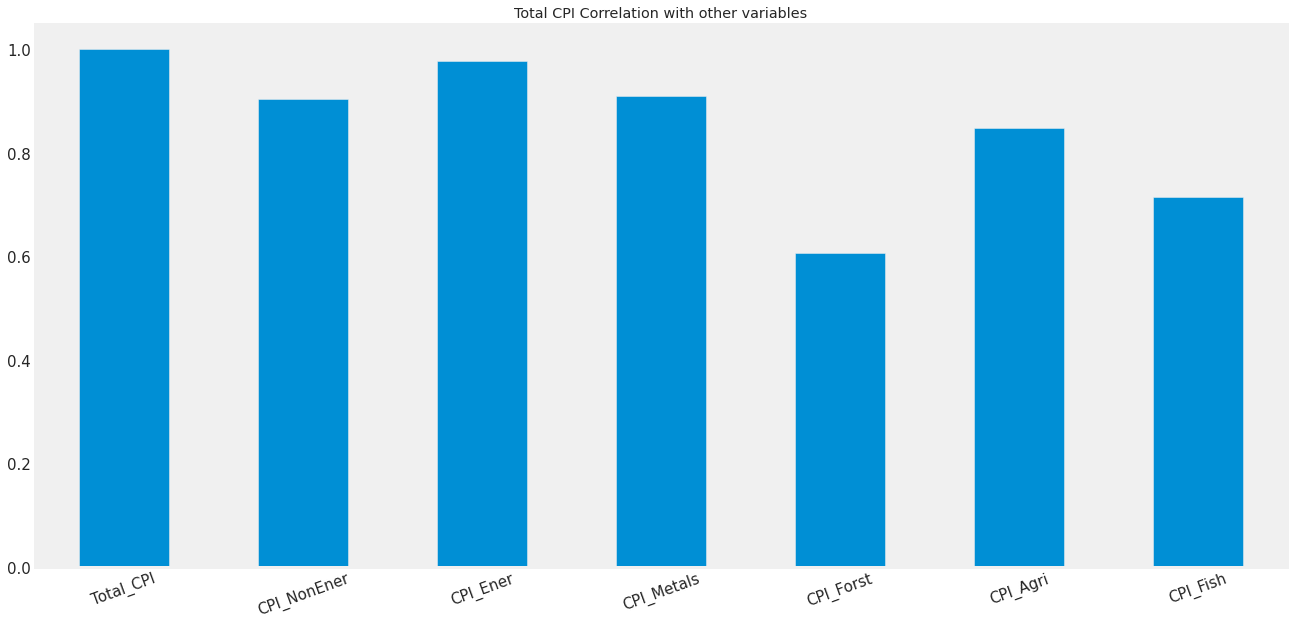

In [175]:
df_new.corrwith(df_new.Total_CPI).plot.bar(
figsize = (20, 10), title = "Total CPI Correlation with other variables", fontsize = 15, rot = 20, grid = False)

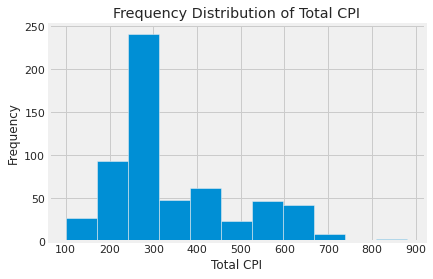

In [176]:
plt.hist(x=df_new['Total_CPI'], bins=11)
plt.xlabel("Total CPI")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Total CPI")
plt.show()

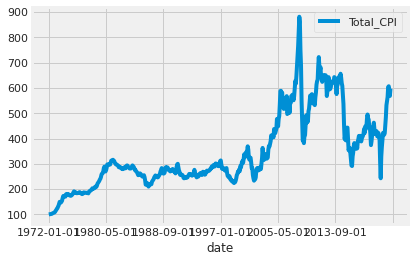

In [177]:
ax = df_new.plot(x='date', y='Total_CPI', rot=0)
plt.legend()


,Total_CPI,CPI_NonEner,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
Total_CPI,1.000000,0.903644,0.977267,0.910876,0.606498,0.848023,0.715992
CPI_NonEner,0.903644,1.000000,0.804170,0.967183,0.822376,0.874488,0.830922
CPI_Ener,0.977267,0.804170,1.000000,0.833749,0.476074,0.788788,0.631449
CPI_Metals,0.910876,0.967183,0.833749,1.000000,0.694953,0.859512,0.763231
CPI_Forst,0.606498,0.822376,0.476074,0.694953,1.000000,0.558940,0.810035
CPI_Agri,0.848023,0.874488,0.788788,0.859512,0.558940,1.000000,0.598726
CPI_Fish,0.715992,0.830922,0.631449,0.763231,0.810035,0.598726,1.000000


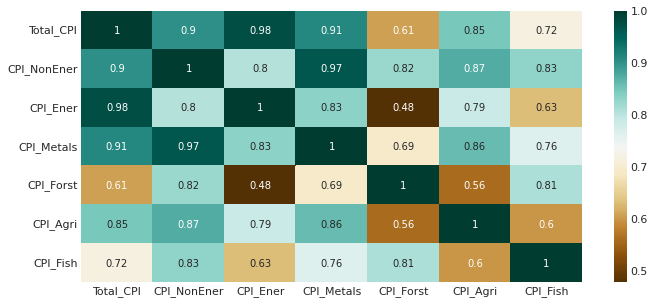

In [178]:
plt.figure(figsize=(10,5))
cor= df_new.corr()
sns.heatmap(cor,cmap="BrBG",annot=True)
cor

#checking correcation of data to identify attributes that are highly correlated with each other

In [179]:
df1 = df_new.drop(['CPI_NonEner', 'date'], axis=1)
df1.head()


,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
0,100.00,100.00,100.00,100.00,100.00,100.00
1,100.40,99.78,100.74,100.12,101.20,88.89
2,101.11,100.05,101.38,100.24,102.53,98.97
3,101.16,99.84,101.21,100.95,102.08,103.10
4,101.88,100.00,101.25,102.32,103.53,86.30


In [180]:
df1.tail()


,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
592,603.08,1173.22,733.52,1101.94,310.20,1451.32
593,606.63,1289.50,720.94,838.80,306.31,1534.54
594,593.87,1334.47,730.52,536.88,321.88,1737.96
595,568.19,1261.77,738.36,437.00,328.36,1658.92
596,596.69,1378.81,749.09,477.69,315.44,1718.73


In [181]:

df1.corr()


,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
Total_CPI,1.000000,0.977267,0.910876,0.606498,0.848023,0.715992
CPI_Ener,0.977267,1.000000,0.833749,0.476074,0.788788,0.631449
CPI_Metals,0.910876,0.833749,1.000000,0.694953,0.859512,0.763231
CPI_Forst,0.606498,0.476074,0.694953,1.000000,0.558940,0.810035
CPI_Agri,0.848023,0.788788,0.859512,0.558940,1.000000,0.598726
CPI_Fish,0.715992,0.631449,0.763231,0.810035,0.598726,1.000000


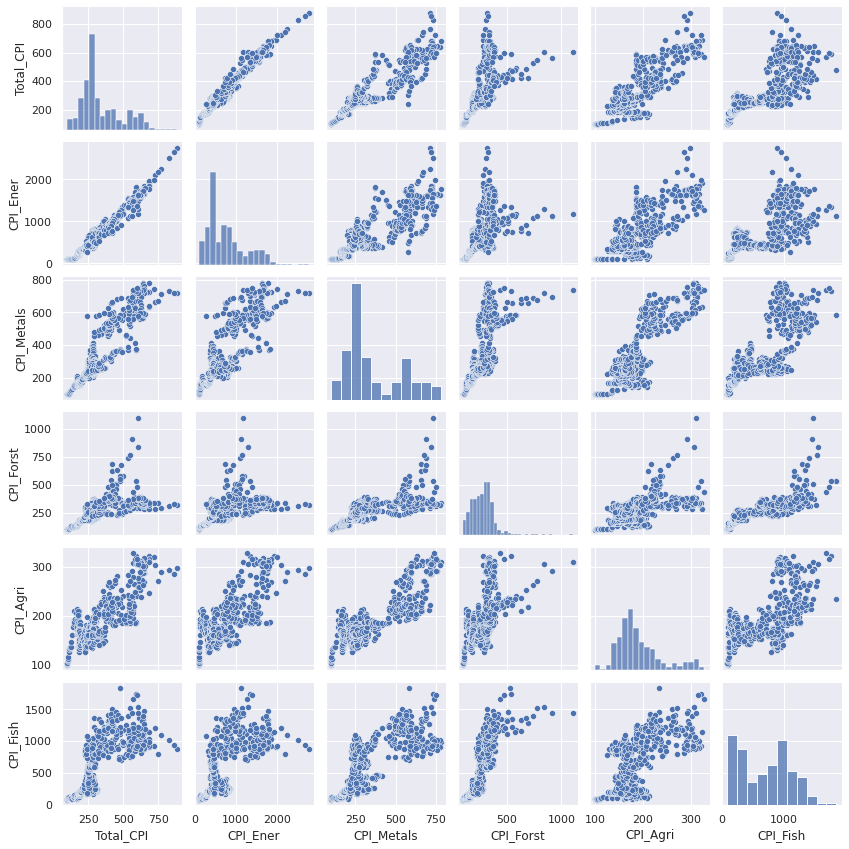

In [182]:

sns.set()
cols = ['Total_CPI', 'CPI_Ener', 'CPI_Metals', 'CPI_Forst', 'CPI_Agri', 'CPI_Fish']
sns.pairplot(df1[cols], height = 2)
plt.show()

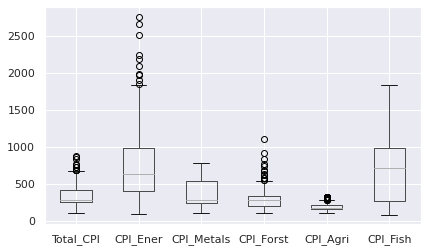

In [183]:
np.random.seed(19680801)

boxplot = df1.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



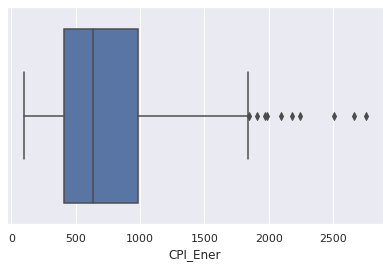

In [184]:
sns.boxplot(df1['CPI_Ener'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



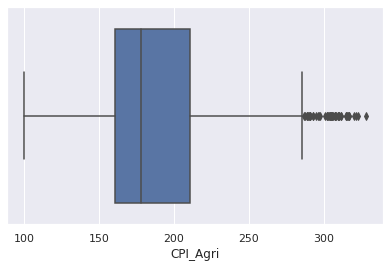

In [185]:
sns.boxplot(df1['CPI_Agri'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



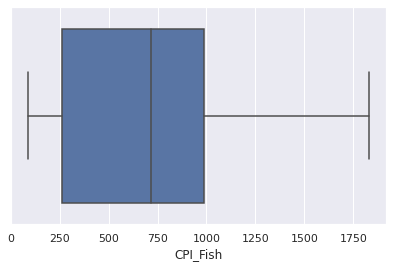

In [186]:
sns.boxplot(df1['CPI_Fish'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



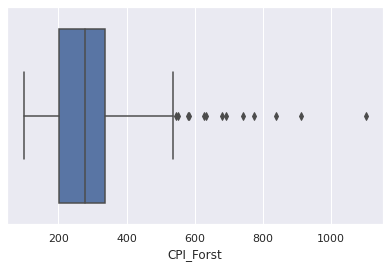

In [187]:
sns.boxplot(df1['CPI_Forst'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



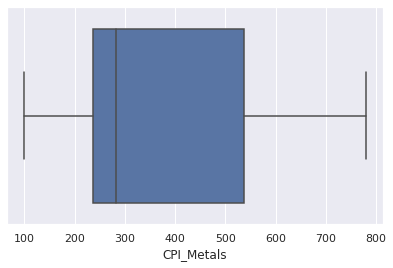

In [188]:
sns.boxplot(df1['CPI_Metals'])



# Multiple Linear Regression

**Defined the independent variables (x)  and dependent variable ( y )**


In [189]:
x=df1.drop(['Total_CPI'], axis=1).values
y=df1['Total_CPI'].values

**Splitting the dataset in training and test sets**

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

**Train the model on the training set**

In [191]:
ml=LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [192]:
ml.coef_

array([0.22475635, 0.14692327, 0.13616469, 0.20458759, 0.00283547])

In [193]:
ml.intercept_

39.1361624311034

**Predict the test set results**

In [194]:
y_pred=ml.predict(x_test)
print(y_pred)

[585.78871118 312.38962012 257.62112357 246.05592524 213.52444526
 319.68303881 273.46459864 460.07029588 639.12974764 470.67502786
 250.89583003 260.66228992 580.61781966 259.08821139 276.36865248
 249.45761139 235.37144438 562.59543123 258.06446737 182.50199924
 511.66902159 245.79535325 183.26680425 251.94158199 582.94093605
 125.21381973 224.05425803 625.20437332 551.90494225 266.28256354
 275.85892582 711.94286428 347.71656768 110.95252089 304.54393521
 618.8499425  610.25960213 299.59417209 295.06116132 315.26476515
 114.39859058 241.03794608 134.52061668 708.7113586  143.45111898
 216.70982567 308.06717721 259.47222035 248.13584607 604.35336684
 250.15579243 370.23816263 324.07815866 249.74345246 292.18738477
 467.08798188 324.91885857 387.26006656 520.06323959 317.67521556
 459.73670979 217.13292373 613.47182078 298.45579427 170.49351985
 535.08766382 217.31189138 172.53869611 186.30646055 310.63236947
 254.43193424 491.84401989 528.33292203 275.04753146 298.06407041
 120.57176

In [195]:
ml.predict([[1378.81,749.09,477.69,315.44,1718.73]])

array([593.54426085])

**Evaluate the accuracy of our model**

In [196]:
r2_score(y_test, y_pred)

0.9927162047522656

**Plot the results**

Text(0.5, 1.0, 'Actual vs. Predicted Total CPI')

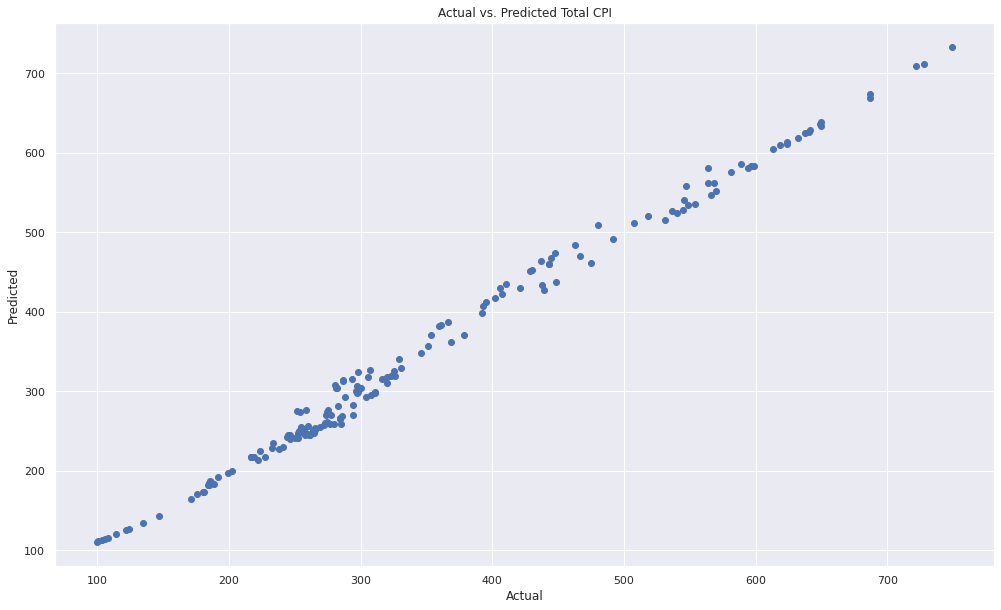

In [197]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Total CPI')

**Predicted Values**

In [198]:
pred_y_df=pd.DataFrame({'Actual Total CPI':y_test, 'Predicted Total CPI': y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Total CPI,Predicted Total CPI,Difference
0,588.52,585.788711,2.731289
1,286.53,312.389620,-25.859620
2,271.99,257.621124,14.368876
3,252.32,246.055925,6.264075
4,221.61,213.524445,8.085555
5,322.98,319.683039,3.296961
6,274.67,273.464599,1.205401
7,443.01,460.070296,-17.060296
8,649.60,639.129748,10.470252
9,466.86,470.675028,-3.815028


**Principal Componnent Analysis (PCA)**

In [199]:
#standard scaling
scaler=StandardScaler()
X_scaled= scaler.fit_transform(df1)

In [200]:

X_scaled

array([[-1.63995706, -1.38077472, -1.47096348, -1.70450339, -1.95282962,
        -1.44976431],
       [-1.63725521, -1.38123547, -1.46678905, -1.70338132, -1.92720006,
        -1.4773464 ],
       [-1.63245943, -1.38067001, -1.46317874, -1.70225925, -1.89879396,
        -1.45232143],
       ...,
       [ 1.69594789,  1.20455635,  2.0858706 ,  2.38058462,  2.78607576,
         2.61669448],
       [ 1.52248921,  1.05230188,  2.13009692,  1.44664718,  2.92447537,
         2.42046691],
       [ 1.71499593,  1.29741691,  2.19062605,  1.8271229 ,  2.64853046,
         2.56895339]])

In [201]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [202]:
ml2= LinearRegression()
ml2.fit(x_train, y_train)
ml2.score(x_test,y_test)

1.0

In [203]:
#reducing our data dimensions into 2
pca=PCA(0.95)

In [204]:
#fit the data with the new dimesion
x_pca= pca.fit_transform(X_scaled)

In [205]:
scaled_data.shape

(597, 6)

In [206]:
x_pca.shape

(597, 3)

In [207]:
pca.explained_variance_ratio_

array([0.78584837, 0.12682708, 0.04522605])

In [208]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=0)

In [209]:
ml2= LinearRegression()
ml2.fit(x_train_pca, y_train)
ml2.score(x_test_pca,y_test)

0.9876276141746076

In [210]:
pca=PCA(n_components=2)


In [211]:
x_pca= pca.fit_transform(X_scaled)


In [212]:
pca.explained_variance_ratio_

array([0.78584837, 0.12682708])

In [213]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=0)
ml2= LinearRegression()
ml2.fit(x_train_pca, y_train)
ml2.score(x_test_pca,y_test)

0.971083819286521

# **Random Forest Regressor**

In [214]:
features = ['CPI_Ener', 'CPI_Agri', 'CPI_Forst', 'CPI_Fish', 'CPI_Metals']
# Separating out the features
x = df1.loc[:, features].values
# Separating out the target
y = df1.loc[:,['Total_CPI']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [215]:
# Labels are the values we want to predict
pred = np.array(df1['Total_CPI'])
# Remove the labels from the features
# axis 1 refers to the columns
df1= df1.drop('Total_CPI', axis = 1)
# Saving feature names for later use
feature_list = list(df1.columns)
# Convert to numpy array
df1 = np.array(df1)

In [288]:

# Split the data into training and testing sets
train_features, test_features, train_pred, test_pred = train_test_split(df1, pred, test_size = 0.30, random_state = 42)

In [289]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_pred.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_pred.shape)

Training Features Shape: (417, 5)
Training Labels Shape: (417,)
Testing Features Shape: (180, 5)
Testing Labels Shape: (180,)


In [329]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_pred);

In [330]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_pred)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')


Mean Absolute Error: 8.2 dollars.


In [331]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_pred)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.08 %.


In [293]:
# Pull out one tree from the forest
tree = rf.estimators_[5]


# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [294]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_pred)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


In [332]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(df2, round(importance, 2)) for df2, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CPI_Ener             Importance: 0.93
Variable: CPI_Metals           Importance: 0.04
Variable: CPI_Forst            Importance: 0.02
Variable: CPI_Agri             Importance: 0.01
Variable: CPI_Fish             Importance: 0.0


In [296]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('CPI_Ener'),feature_list.index('CPI_Metals'), feature_list.index('CPI_Forst')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_pred)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_pred)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')
mape = np.mean(100 * (errors / test_pred))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 7.84 dollars.
Accuracy: 98.12 %.


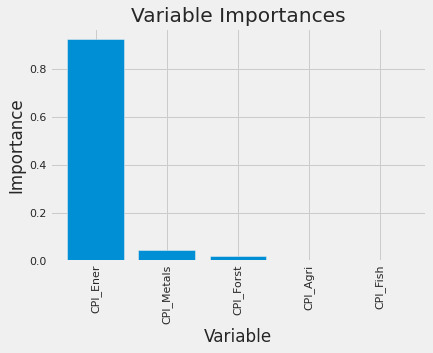

In [333]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# K Fold Validation

In [352]:
folds=StratifiedKFold(n_splits=5)
folds

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [353]:
cross_val_score(LinearRegression(),x_pca,y)

array([0.78187151, 0.83212981, 0.21892769, 0.88308563, 0.60078757])

In [354]:
cross_val_score(RandomForestRegressor(),x,np.ravel(y,order='C'))

array([0.19285335, 0.71883642, 0.77796352, 0.85467753, 0.92638892])